In [1]:
from xfoil import XFoil

xfoil_object = XFoil("data/NACA0012.dat", 0, 1e6, [-18.5, 18.5, 0.25], disable_graphics=True)
xfoil_object.run()

In [2]:
result = xfoil_object.results[0]['result']
print(xfoil_object.results[0]['result'])

{'alpha': [-18.5, -18.25, -18.0, -17.75, -17.5, -17.25, -17.0, -16.75, -16.5, -16.25, -16.0, -15.75, -15.5, -15.25, -15.0, -14.75, -14.5, -14.25, -14.0, -13.75, -13.5, -13.25, -13.0, -12.75, -12.5, -12.25, -12.0, -11.75, -11.5, -11.25, -11.0, -10.75, -10.5, -10.25, -10.0, -9.75, -9.5, -9.25, -9.0, -8.75, -8.5, -8.25, -8.0, -7.75, -7.5, -7.25, -7.0, -6.75, -6.5, -6.25, -6.0, -5.75, -5.5, -5.25, -5.0, -4.75, -4.5, -4.25, -4.0, -3.75, -3.5, -3.25, -3.0, -2.75, -2.5, -2.25, -2.0, -1.75, -1.5, -1.25, -1.0, -0.75, -0.5, -0.25, 0.0, 0.25, 0.5, 0.75, 1.0, 1.25, 1.5, 1.75, 2.0, 2.25, 2.5, 2.75, 3.0, 3.25, 3.5, 3.75, 4.0, 4.25, 4.5, 4.75, 5.0, 5.25, 5.5, 5.75, 6.0, 6.25, 6.5, 6.75, 7.0, 7.25, 7.5, 7.75, 8.0, 8.25, 8.5, 8.75, 9.0, 9.25, 9.5, 9.75, 10.0, 10.25, 10.5, 10.75, 11.0, 11.25, 11.5, 11.75, 12.0, 12.25, 12.5, 12.75, 13.0, 13.25, 13.5, 13.75, 14.0, 14.25, 14.5, 14.75, 15.0, 15.25, 15.5, 15.75, 16.0, 16.25, 16.5, 16.75, 17.0, 17.25, 17.5, 17.75, 18.0, 18.25, 18.5], 'CL': [-1.2635, -1.2817, 

Text(0.5, 1.0, 'CM v alpha')

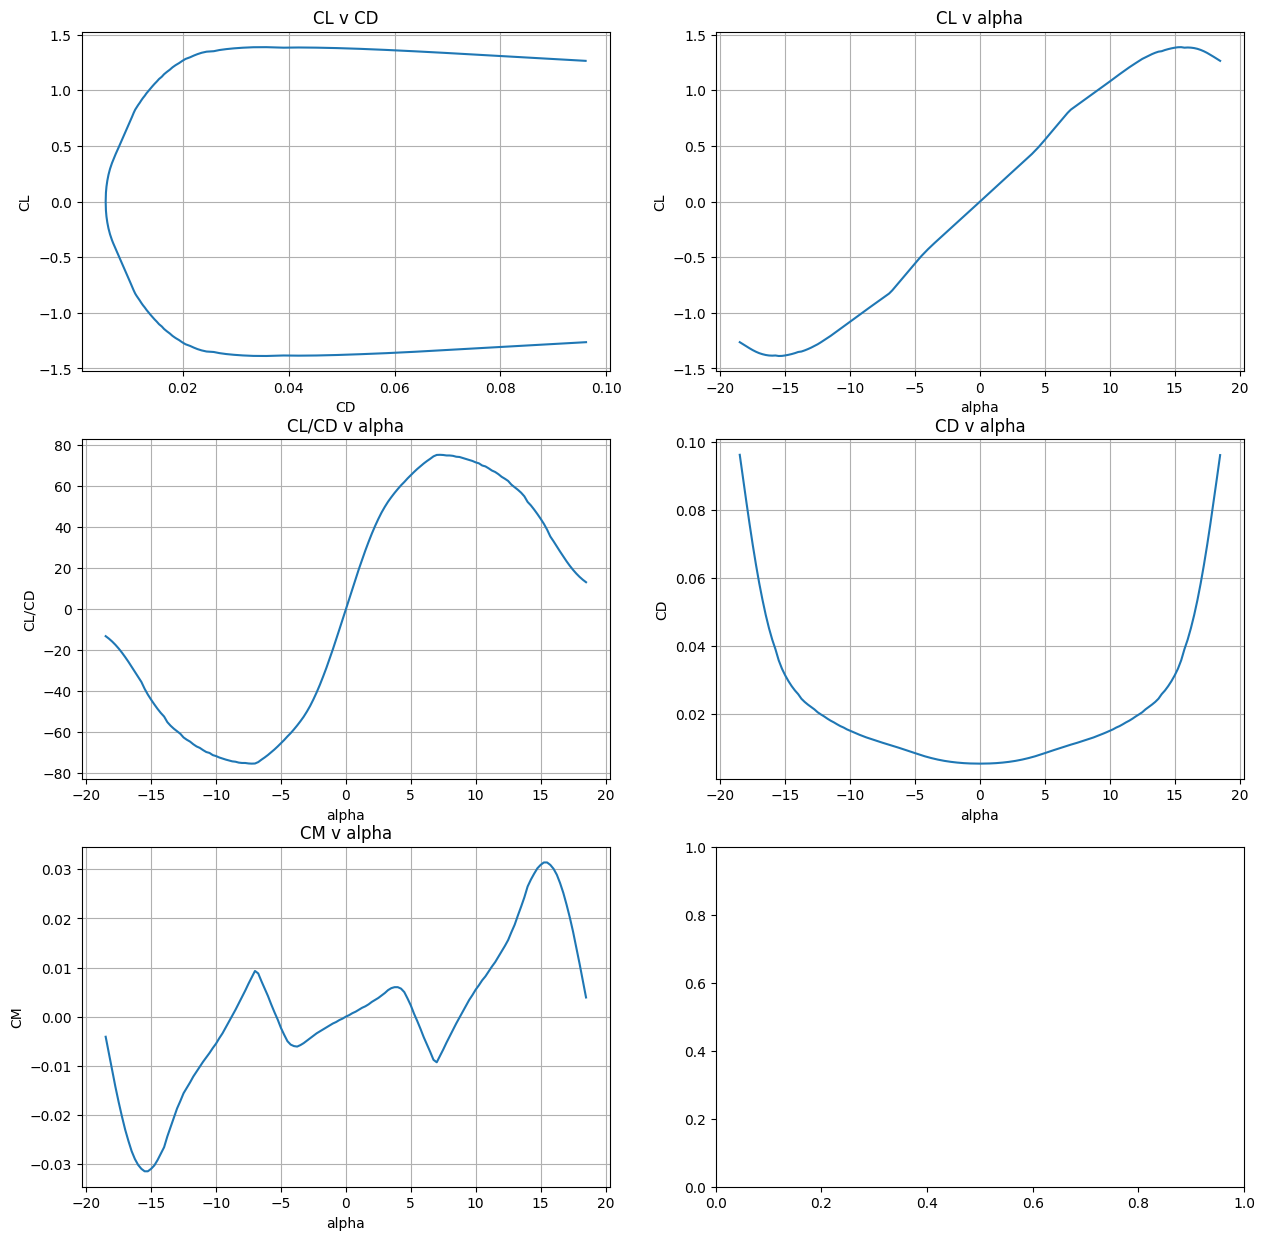

In [3]:
import matplotlib.pyplot as plt

fix, axs = plt.subplots(3, 2, figsize=(15, 15))
axs[0][0].plot(result['CD'], result['CL'])
axs[0][0].set_xlabel('CD')
axs[0][0].set_ylabel('CL')
axs[0][0].grid(True)
axs[0][0].set_title('CL v CD')

axs[0][1].plot(result['alpha'], result['CL'])
axs[0][1].set_xlabel('alpha')
axs[0][1].set_ylabel('CL')
axs[0][1].grid(True)
axs[0][1].set_title('CL v alpha')

axs[1][0].plot(result['alpha'], [cl/cd for cl, cd in zip(result['CL'], result['CD'])])
axs[1][0].set_xlabel('alpha')
axs[1][0].set_ylabel('CL/CD')
axs[1][0].grid(True)
axs[1][0].set_title('CL/CD v alpha')

axs[1][1].plot(result['alpha'], result['CD'])
axs[1][1].set_xlabel('alpha')
axs[1][1].set_ylabel('CD')
axs[1][1].grid(True)
axs[1][1].set_title('CD v alpha')

axs[2][0].plot(result['alpha'], result['CM'])
axs[2][0].set_xlabel('alpha')
axs[2][0].set_ylabel('CM')
axs[2][0].grid(True)
axs[2][0].set_title('CM v alpha')



In [4]:
# Testing single alpha case
from xfoil import XFoil
xfoil_object_2 = XFoil("data/NACA0012.dat", 0, 1e6, [10], disable_graphics=True)
xfoil_object_2.run()

result = xfoil_object_2.results[0]['result']
print(xfoil_object_2.results[0]['result'])

{'alpha': [10.0], 'CL': [1.0796], 'CD': [0.01508], 'CDp': [0.00916], 'CM': [0.0055], 'Top_Xtr': [0.0261], 'Bot_Xtr': [1.0]}
